In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dft=pd.read_csv('/content/drive/My Drive/IBM_sentiment_analysis/data/cleaned_vader_labelled_5days_partition/mar_11-15.csv')


In [ ]:
df=dft
print(df.shape)
df.isnull().sum()
df.head()

(171586, 7)


,date,id,text,hashtags,retweet_count,location,cleaned
0,2020-03-11,1237645989554487296,We all need to take care in the view of #Coron...,"['Coronavirus', 'BudgetSession', 'Corona']",225.0,{'country_code': 'in'},need take care view coronavirus time need ensu...
1,2020-03-11,1237783717025742849,"""Coronavirus: WHO classifies COVID-19 as a pan...",['Coronavirus'],0.0,{'country_code': 'in'},coronavirus classifies covid pandemic coronavirus
2,2020-03-11,1237784165803671552,"""To ensure the coronavirus doesn’t spread in D...",[],888.0,{'country_code': 'in'},ensure coronavirus spread delhi hindu mahasabh...
3,2020-03-11,1237784388189835265,In '60s-70s we had Moscow's 'useful idiots'. T...,"['India', 'COVID19']",699.0,"{'country_code': 'in', 'state': 'Delhi', 'cit...",moscow useful idiots today beijing useful idio...
4,2020-03-11,1237785666433339392,"#CoronaVirusUpdate,#pandemia As of 11 Mar.20, ...","['CoronaVirusUpdate', 'pandemia']",44.0,"{'country_code': 'in', 'state': 'Gujarat', 'c...",coronavirusupdate pandemia mar countries repor...


In [ ]:
df.tail()

,date,id,text,hashtags,retweet_count,location,cleaned
171581,2020-03-15,1239246887284285448,German government is trying to stop the US gov...,[],138.0,"{'country_code': 'in', 'state': 'Bihar'}",german government trying stop us government pe...
171582,2020-03-15,1239181252734976000,"The 'independent' Spanish press.\n\n""The COVID...",[],22.0,"{'country_code': 'in', 'state': 'Andhra Prade...",independent spanish press covid excuse reinfor...
171583,2020-03-15,1239276139970850816,#COVID19india \nFriend 1 - Are kya hall hai br...,"['COVID19india', 'coronavirus']",1.0,{'country_code': 'in'},covid india friend kya hall hai bro ? ? friend...
171584,2020-03-15,1239206840438681600,This. #Corona Virus has no idea about other de...,['Corona'],0.0,{'country_code': 'in'},corona virus idea deadlier viruses
171585,2020-03-15,1239185076220579840,#COVID2019 reaching new locations in the count...,"['COVID2019', 'Uttarakhand']",7.0,{'country_code': 'in'},covid reaching new locations country st confir...


In [ ]:
print(df.shape)
df.isnull().sum()

(171586, 7)


date             0
id               0
text             0
hashtags         1
retweet_count    1
location         1
cleaned          0
dtype: int64

In [ ]:
!pip install -U pywsd

Requirement already up-to-date: pywsd in /usr/local/lib/python3.6/dist-packages (1.2.4)


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
text_clean=df['cleaned']

In [ ]:
text_clean=text_clean.str.replace('?','')
text_clean=text_clean.str.replace('!','')

In [ ]:
text_clean[:5]

0    need take care view coronavirus time need ensu...
1    coronavirus classifies covid pandemic coronavirus
2    ensure coronavirus spread delhi hindu mahasabh...
3    moscow useful idiots today beijing useful idio...
4    coronavirusupdate pandemia mar countries repor...
Name: cleaned, dtype: object

In [ ]:
print(len(text_clean))
text_clean[0]

171586


'need take care view coronavirus time need ensure panic created interaction media budgetsession corona'

In [ ]:
from pywsd.utils import lemmatize_sentence
t_clean=[lemmatize_sentence(s) for s in text_clean]

Warming up PyWSD (takes ~10 secs)... took 6.180875539779663 secs.


In [ ]:
t_clean[0]

['need',
 'take',
 'care',
 'view',
 'coronavirus',
 'time',
 'need',
 'ensure',
 'panic',
 'create',
 'interaction',
 'medium',
 'budgetsess',
 'corona']

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
from itertools import chain
words=list(chain.from_iterable(t_clean))


In [ ]:
print(words[0])

need


In [ ]:
string=' '.join(words)

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10,stopwords=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel']).generate(string)

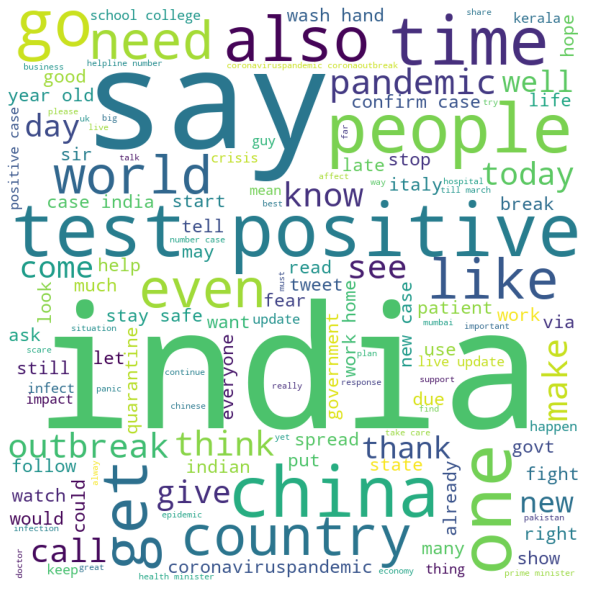

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
f_clean=[]
for l in t_clean:
  s=' '.join(l)
  f_clean.append(s)

In [ ]:
f_clean[:5]

['need take care view coronavirus time need ensure panic create interaction medium budgetsess corona',
 'coronavirus classifies covid pandemic coronavirus',
 'ensure coronavirus spread delhi hindu mahasabha decide organise gaumutra party line tea party accord president chakrapani maharaj cowdung cake gaumutra drink gala party gaumutra par charcha',
 'moscow useful idiot today beijing useful idiot mock victim ticket ride proverbial gravy train india affect country feel sorry covid',
 'coronavirusupdate pandemia mar country report contracted covid declare coronavirus outbreak pandemic']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, ngram_range=(2,3),stop_words=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel'])
tf = tf_vectorizer.fit_transform(f_clean)
tf_feature_names = tf_vectorizer.get_feature_names()

In [ ]:
tf_feature_names

['abuse fascist',
 'abuse fascist brahminical',
 'across country',
 'across globe',
 'across india',
 'across world',
 'action take',
 'actor tom',
 'actor tom hank',
 'advisory issue',
 'affair minister',
 'affect country',
 'affected country',
 'agltiles ig',
 'agltiles ig instagood',
 'aid etc',
 'aid etc saint',
 'air india',
 'alcohol base',
 'amid fear',
 'amid outbreak',
 'amid pandemic',
 'amid scare',
 'april due',
 'around world',
 'arteta test',
 'arteta test positive',
 'article know',
 'article know symptom',
 'avoid crowd',
 'avoid large',
 'avoid public',
 'avoid spread',
 'avoid touch',
 'avoid travel',
 'awareness campaign',
 'back home',
 'ban travel',
 'basic protective',
 'basic protective measure',
 'beaware quiz',
 'beaware quiz contest',
 'behind closed',
 'behind closed door',
 'best way',
 'biological weapon',
 'boost immunity',
 'brahminical hindutva',
 'brahminical hindutva sponsor',
 'break new',
 'break news',
 'bring back',
 'bring total',
 'call due',
 'c

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [ ]:
def display_topics(model, feature_names, no_top_words):
  s=''
  for topic_idx, topic in enumerate(model.components_):
    s=s+("Topic %d:" % (topic_idx))
    s=s+(",".join([feature_names[i]
                    for i in topic.argsort()[:-no_top_words - 1:-1]]))
    s=s+'\n'
  return s

no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

'Topic 0:test positive,wash hand,video conference,stay home,coronaviruspandemic coronaoutbreak,india coronavirusupdates,many people,coronaindia india,fake news,soap water\nTopic 1:school college,till march,prime minister,cinema hall,health ministry,national emergency,amid outbreak,declare national,st march,coronaoutbreak coronavirusupdates\nTopic 2:work home,social distancing,india india,coronaviruschallenge coronaviruspandemic,due outbreak,coronavirusindia coronaviruschallenge,social medium,coronavirusindia coronaviruschallenge coronaviruspandemic,coronavirusreachesdelhi coronavirusindia,self quarantine\nTopic 3:public health,test negative,th march,stop spread,oil lamp,india coronavirusindia,isolation ward,wear mask,indian oil lamp,indian oil\nTopic 4:stay safe,precautionary measure,prevent spread,take precaution,around world,whole world,coronavirusupdates coronavirusindia,declare pandemic,preventive measure,coronavirusindia coronavirusupdates\nTopic 5:social distance,donald trump,cow

In [ ]:
lda.perplexity(tf)

599.0389172871339

In [ ]:
f=open('lda_mar_11-15.pk','wb')
import pickle
pickle.dump(lda, f)
f.close()

In [ ]:
f = open("topics_mar_11-15.txt", "w")
f.write(display_topics(lda, tf_feature_names, no_top_words))
f.close()

In [ ]:
import shutil
shutil.move('lda_mar_11-15.pk','/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/saved_models/lda_mar_11-15.pk')
shutil.move("topics_mar_11-15.txt",'/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/topics_text_files/topics_mar_11-15.txt')